In [1]:
#getting system ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
#displays in line in Jupyter notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Train_practice.csv')
test = pd.read_csv('Test_practice.csv')

In [3]:
#make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
#training data has one more column than the test data

In [6]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [7]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [8]:
#change datetime column data type to datetime from object data type

train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [9]:
#extract the year, month, day and hour from the Datetime to validate our hypothesis

for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [10]:
#new column extract the day of week from Datetime and then assign whether the day is a weekend or not
train['day_of_week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

test['day_of_week'] = test['Datetime'].dt.dayofweek
temp2 = test['Datetime']

In [11]:
#assign 1 if the day of week is a weekend and 0 if not

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [12]:
train.columns, train.dtypes, train.shape, train.head()

(Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'Hour',
        'day_of_week', 'weekend'],
       dtype='object'), ID                      int64
 Datetime       datetime64[ns]
 Count                   int64
 year                    int64
 month                   int64
 day                     int64
 Hour                    int64
 day_of_week             int64
 weekend                 int64
 dtype: object, (18288,
  9),    ID            Datetime  Count  year  month  day  Hour  day_of_week  weekend
 0   0 2012-08-25 00:00:00      8  2012      8   25     0            5        1
 1   1 2012-08-25 01:00:00      2  2012      8   25     1            5        1
 2   2 2012-08-25 02:00:00      6  2012      8   25     2            5        1
 3   3 2012-08-25 03:00:00      2  2012      8   25     3            5        1
 4   4 2012-08-25 04:00:00      2  2012      8   25     4            5        1)

In [13]:
test.columns, test.dtypes, test.shape, test.head()

(Index(['ID', 'Datetime', 'year', 'month', 'day', 'Hour', 'day_of_week'], dtype='object'),
 ID                      int64
 Datetime       datetime64[ns]
 year                    int64
 month                   int64
 day                     int64
 Hour                    int64
 day_of_week             int64
 dtype: object,
 (5112, 7),
       ID            Datetime  year  month  day  Hour  day_of_week
 0  18288 2014-09-26 00:00:00  2014      9   26     0            4
 1  18289 2014-09-26 01:00:00  2014      9   26     1            4
 2  18290 2014-09-26 02:00:00  2014      9   26     2            4
 3  18291 2014-09-26 03:00:00  2014      9   26     3            4
 4  18292 2014-09-26 04:00:00  2014      9   26     4            4)

Text(0,0.5,'Passenger')

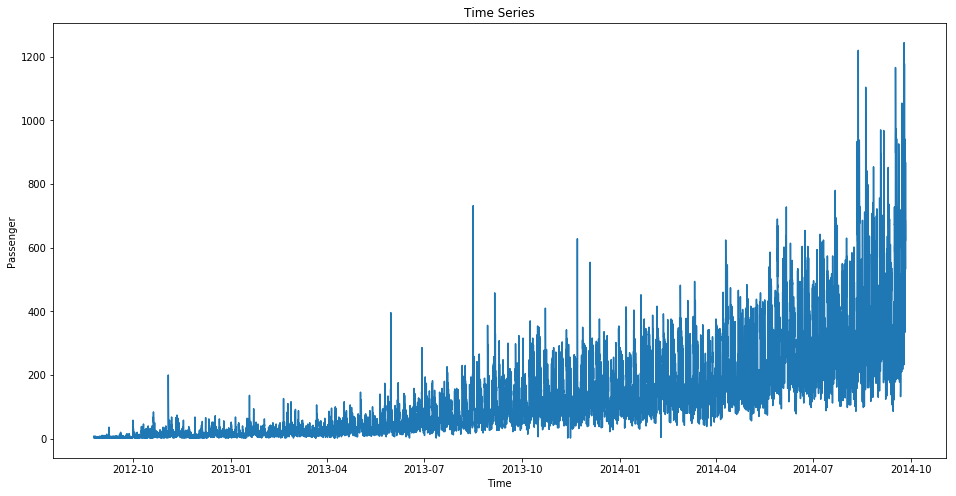

In [14]:
#indexing the Datetime to get the time period on the x-axis

train.index = train['Datetime']

#drop ID variable to get only the Datetime on x-axis.

df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = 'Passenger_Count')
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('Passenger')


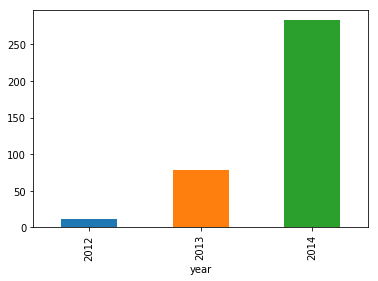

In [15]:
#test if trend over the years

train.groupby('year')['Count'].mean().plot.bar()

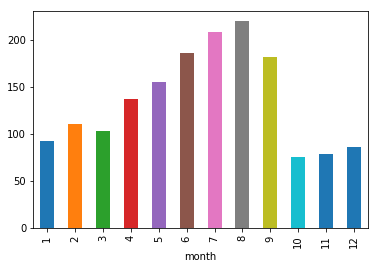

In [16]:
#test if increase in traffic from May to October

train.groupby('month')['Count'].mean().plot.bar()

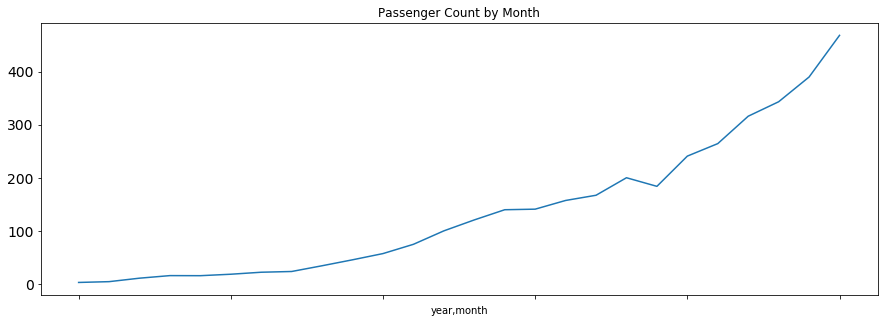

In [17]:
#last 3 months decreased dramatically - looks abnormal

train.groupby(['year','month'])['Count'].mean().plot.line(figsize = (15,5), title = 'Passenger Count by Month', fontsize = 14)

In [18]:
#no data for Oct Nov and Dec in 2012 - this is skewing the data - should we remove 2014 to even out the results?

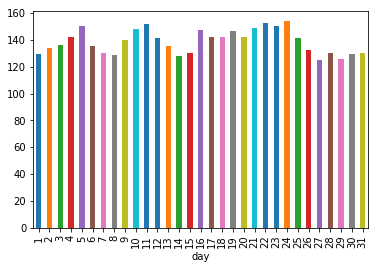

In [19]:
#let's check the daily mean of passenger count

train.groupby('day')['Count'].mean().plot.bar()

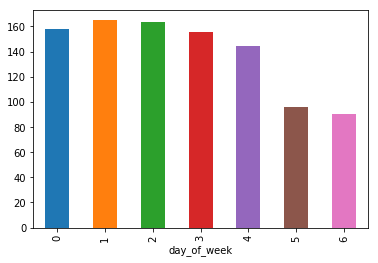

In [20]:
#no discernible insight from above chart
#should also test day of week


train.groupby('day_of_week')['Count'].mean().plot.bar()

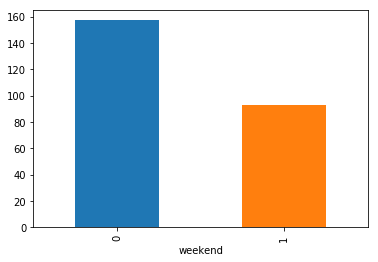

In [21]:
#test weekday vs weekend, 0 being the weekday and 1 being weekend

train.groupby('weekend')['Count'].mean().plot.bar()

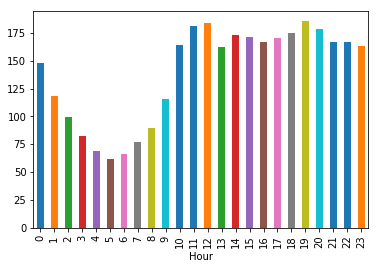

In [22]:
#test hypothesis that traffic will be more during peak hours

train.groupby('Hour')['Count'].mean().plot.bar()

In [23]:
#can see some peaks, slight increase in activity from 17:00 to 19:00 and 10:00 to 12:00

In [24]:
#drop the ID variable as it has nothing to do with the passenger count

train = train.drop('ID',1)

In [25]:
#aggregate the hourly series to daily, weekly, and monthly time series to reduce noise
#this will make it more stable for a model to learn

#Timestamp is the pandas equivalent of python's Datetime
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Hourly time series
#resample is frequency conversion and and resampling of time series
hourly = train.resample('H').mean()

#Converting to daily mean
daily = train.resample('D').mean()

#Converting to weekly
weekly = train.resample('W').mean()

#Converting to monthly
monthly = train.resample('M').mean()

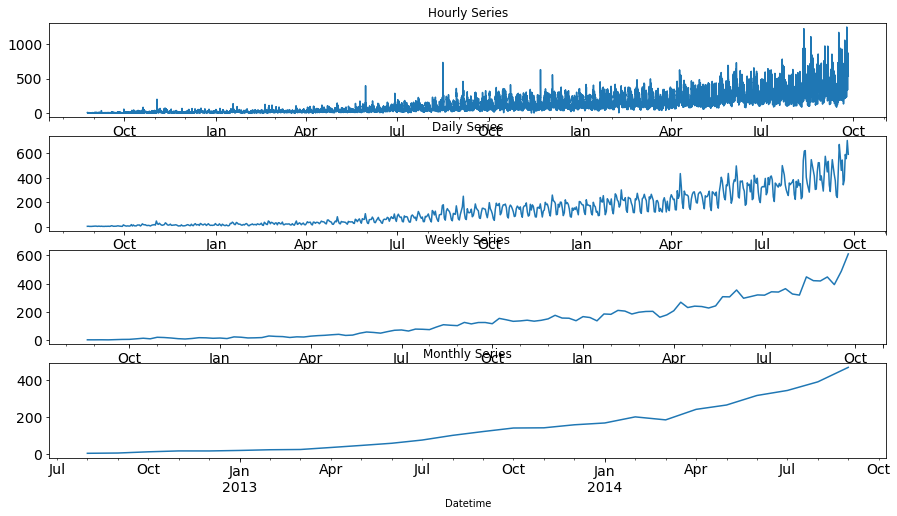

In [26]:
#look at hourly, daily, weekly, and monthly time series

fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = 'Hourly Series', fontsize = 14, ax=axs[0])
daily.Count.plot(figsize =(15,8), title = 'Daily Series', fontsize = 14, ax=axs[1])
weekly.Count.plot(figsize =(15,8), title = 'Weekly Series', fontsize = 14, ax=axs[2])
monthly.Count.plot(figsize =(15,8), title = 'Monthly Series', fontsize = 14, ax=axs[3])

In [27]:
#work on daily time series in test

test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
test.index = test.Timestamp
#converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp
#converting to daily mean
train = train.resample('D').mean()

In [28]:
#splitting the data into training and validation parts
#need a dataset (validation) to check the performance and generalisation ability of our model
#dataset should have the true values of the dependent variable against which the predictions can be checked
#model should not be trained on the validation dataset. cannot train the model on the train dataset and validation as well
#split, one dataset is used to train the model and the other is used as validation, where we make the prediction


In [29]:
#take the last 3 months as validation and the rest for training data

Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

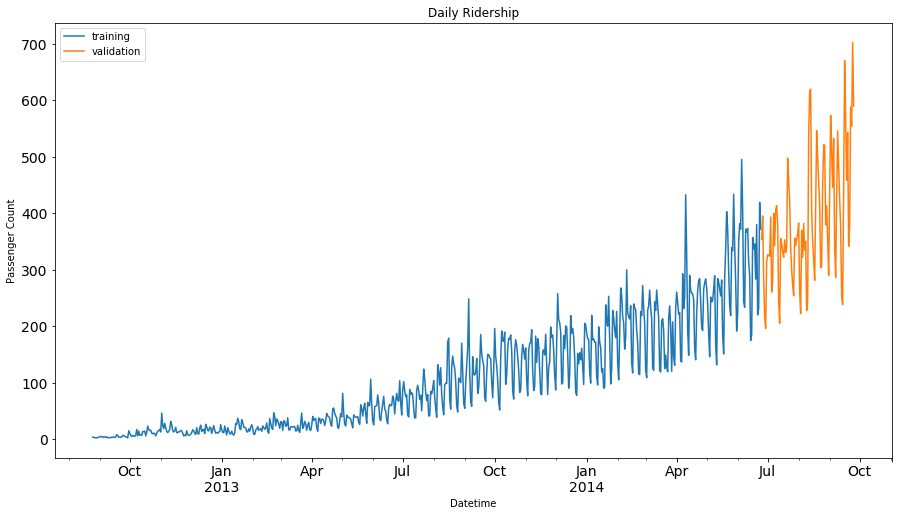

In [30]:
Train.Count.plot(figsize=(15,8), title = 'Daily Ridership', fontsize = 14, label = 'training')
valid.Count.plot(figsize=(15,8), title = 'Daily Ridership', fontsize = 14, label = 'validation')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

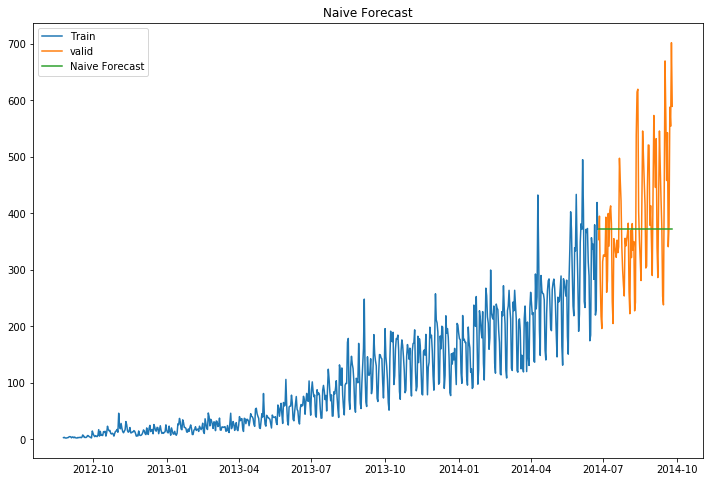

In [31]:
#Model the naive approach for the validation dataset

dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [32]:
#calculate how close to observed data using rmse(Root Mean Square Error)
#this is a measure of how far from the regression line data points are

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


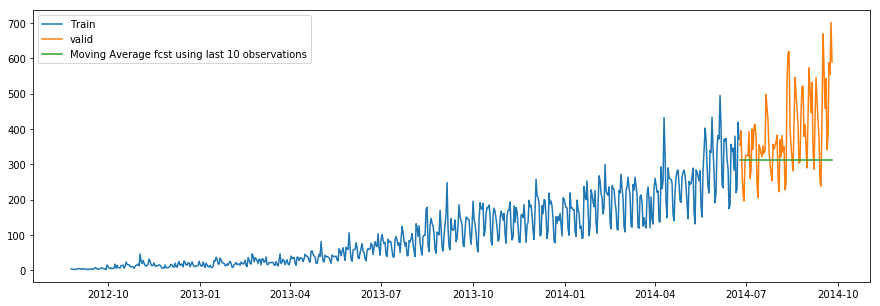

In [33]:
#Model the rolling average technique, the average of the passenger counts for last few time periods only

#Take the rolling mean for the last 10, 20, 50 days and visualize the results

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast']= Train['Count'].rolling(10).mean().iloc[-1] #avg of last 10 observations

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label= 'Moving Average fcst using last 10 observations')
plt.legend(loc='Best')
plt.show()


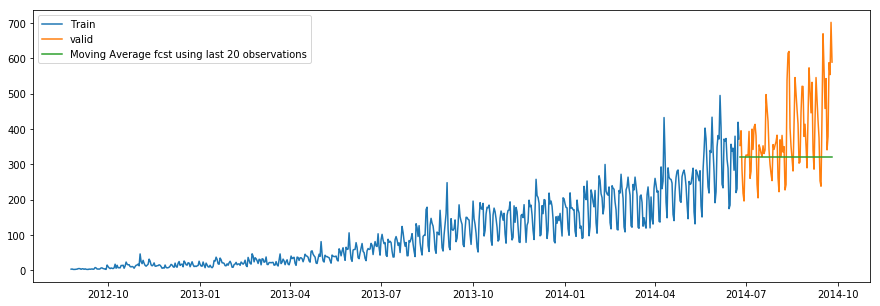

In [34]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast']= Train['Count'].rolling(20).mean().iloc[-1] #avg of last 20 observations

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label= 'Moving Average fcst using last 20 observations')
plt.legend(loc='Best')
plt.show()

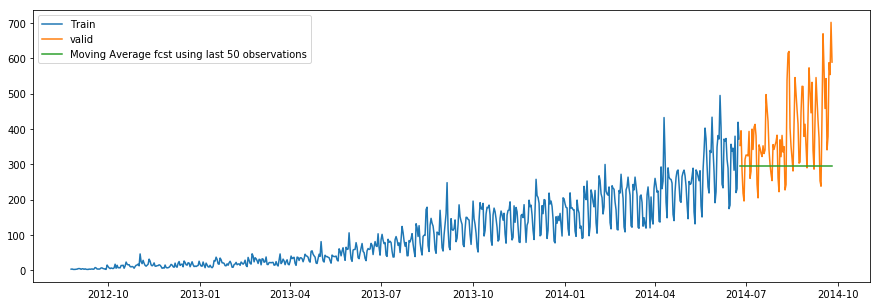

In [35]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast']= Train['Count'].rolling(50).mean().iloc[-1] #avg of last 50 observations

plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label= 'Moving Average fcst using last 50 observations')
plt.legend(loc='best')
plt.show()

In [36]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


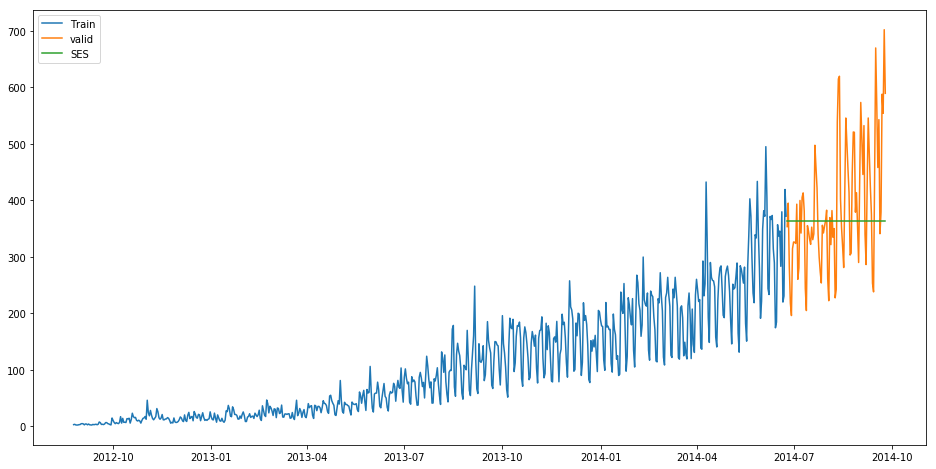

In [37]:
#Model simple exponential smoothing, aka weighted moving avg, assign larger weight to more recent observations
#Weight decreases exponentially as observations come from further in the past

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_wavg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized =False)
y_hat_wavg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'valid')
plt.plot(y_hat_wavg['SES'], label = 'SES')
plt.legend(loc='best')
plt.show()

In [38]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_wavg.SES))
print(rms)

113.43708111884514


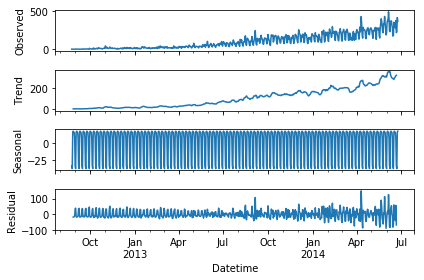

In [39]:
#Model Holt's linear trend model, extension of simple exponential smoothing to allow forecasting of data with a trend
#we can decompose the time series into 4 parts

import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()


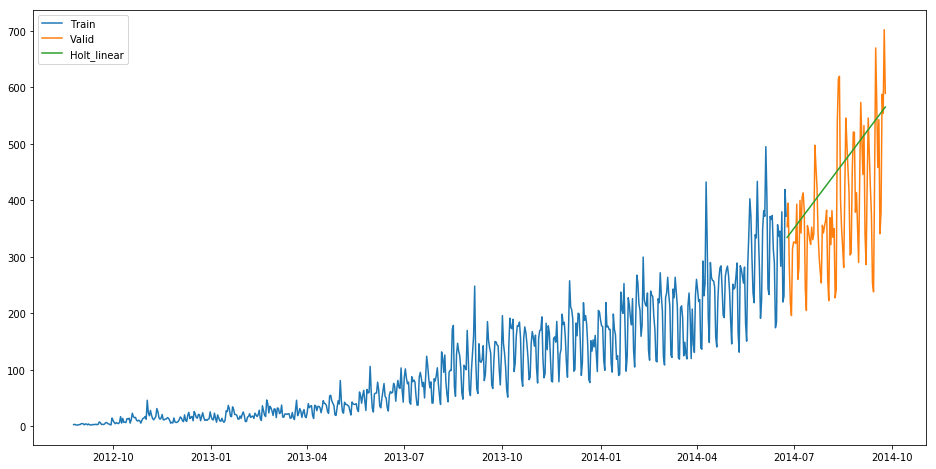

In [40]:
#make a model based on the trend

y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [41]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [42]:
#now time to predict passenger count using the test data
#make predictions on the daily time series and then will distribute that daily prediction to hourly predictions

#Load on the submission file

submission = pd.read_csv('Submission_practice.csv')

In [43]:
#Make daily predictions for the test dataset

predict = fit1.forecast(len(test))

#Save in a new file

test['prediction'] = predict

#Need to convert to hourly predictions

In [44]:
#calculate the hourly ratio of passenger count for each hour
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [45]:
#grouping the hourly ratio
temp = train_original.groupby(['Hour'])['ratio'].sum()

In [46]:
#groupby to csv format
pd.DataFrame(temp, columns = ['Hour','ratio']).to_csv('GROUPby.csv')

In [47]:
temp2 = pd.read_csv('GROUPby.csv')
temp2 = temp2.drop('Hour.1', 1)
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [48]:
#Merge test and test_original on day, month, and year

merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

In [49]:
#predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

In [50]:
#converting the ratio to the original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['Id'] = prediction['ID_y']
prediction.head()

,ID_x,day,day_of_week,prediction,ID_y,Hour,ratio,Count,Id
0,18299.5,26.0,4.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,4.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,4.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,4.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,4.0,334.650767,18292,4,0.020802,167.075574,18292


In [51]:
#drop all other features from the submission file and keep ID and Count only
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'Hour', 'ratio', 'day_of_week'], axis = 1)
submission.head()

,Count,Id
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292


In [52]:
#converting the submission to csv format
pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt_linear.csv')

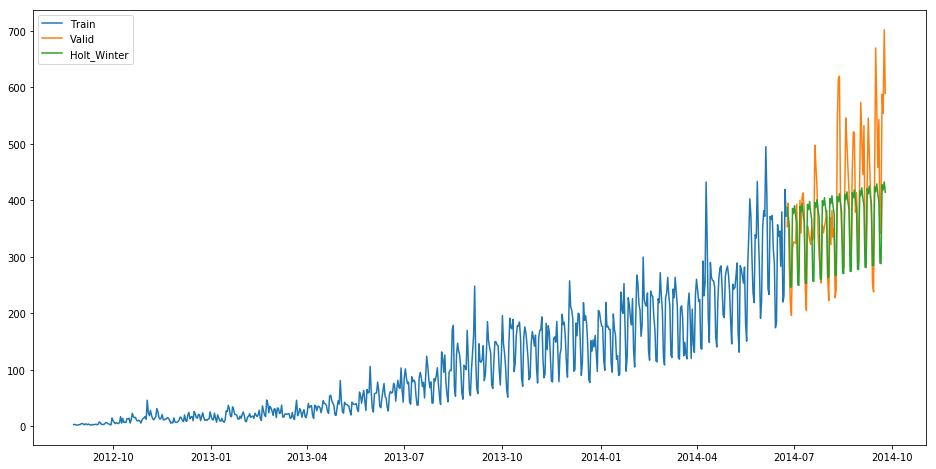

In [53]:
#need a method that takes into account both trend and seasonality when forecasting
#Holt’s Winter applies exponential smoothing to the seasonal components in addition to level and trend

#first fit the model on training dataset and validate it using the validation dataset

y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods = 7, trend = 'add', seasonal = 'add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [54]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37366465473382


In [55]:
#forecast the Counts for the entire length of the Test dataset

predict = fit1.forecast(len(test))

In [56]:
#convert these daily passenger count into hourly passenger count using the same approach as before

test['prediction'] = predict

In [57]:
#merge test and test original on day month and year

merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge ['Hour_y']
merge = merge.drop(['year', 'month' , 'Datetime', 'Hour_x', 'Hour_y'], axis = 1)

#predict by merging merge and temp2

prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#converting the ratio to the original scale

prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction.head()

,ID_x,day,day_of_week,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,4.0,387.359302,18288,0,0.044287,411.715723
1,18299.5,26.0,4.0,387.359302,18289,1,0.035343,328.570687
2,18299.5,26.0,4.0,387.359302,18290,2,0.029911,278.072003
3,18299.5,26.0,4.0,387.359302,18291,3,0.024714,229.760962
4,18299.5,26.0,4.0,387.359302,18292,4,0.020802,193.390496


In [58]:
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x', 'day', 'day_of_week', 'prediction', 'ID_y', 'Hour', 'ratio'], axis = 1)

pd.DataFrame(submission, columns = ['ID', 'Count']).to_csv('Holt_winters.csv')

In [59]:
#ARIMA model

#ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation

#first need to make sure time series is stationary by using Dickey Fuller test
#the null hypothesis of this test is that it is not stationary


from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(24).mean() #window of 24 hours each day
    rolstd = timeseries.rolling(24).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'original')
    mean = plt.plot(rolmean, color = 'red', label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show(block = False)
    
    #perform dickey fuller test
    print("Results of Dickey Fuller test:")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [60]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

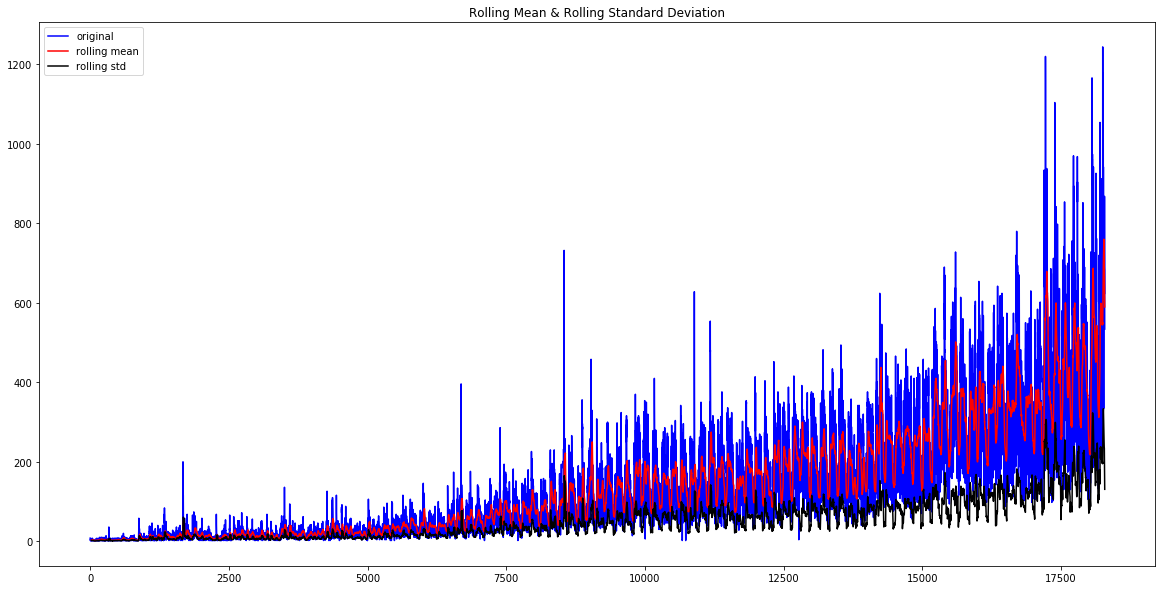

Results of Dickey Fuller test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags used                        45.000000
Number of observations Used    18242.000000
Critical Value (10%)              -2.566854
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
dtype: float64


In [61]:
test_stationarity(train_original['Count'])

In [62]:
#test statistic is less than critical value so time series is stationary
#however we can see an increasing trend, so firstly we need to make the data more stationary
#to do so, we need to remove trend and seasonality from the data

In [63]:
#Removing Trend by taking the the rolling average

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

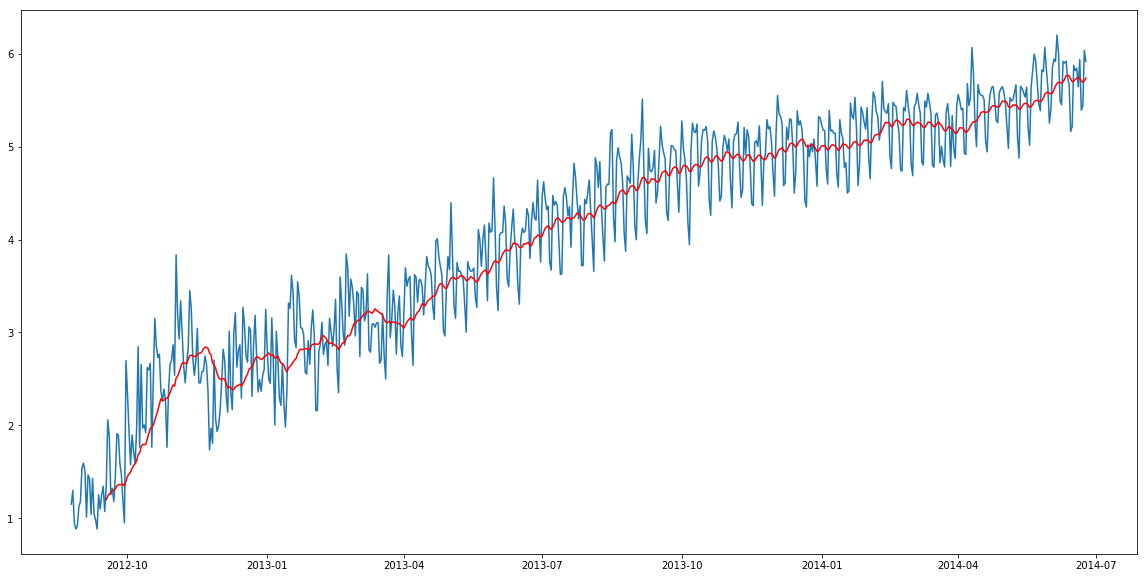

In [64]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [65]:
#we can observe an increasing trend. remove this increasing trend to make our time series stationary

In [66]:
train_log_moving_avg_diff = Train_log - moving_avg

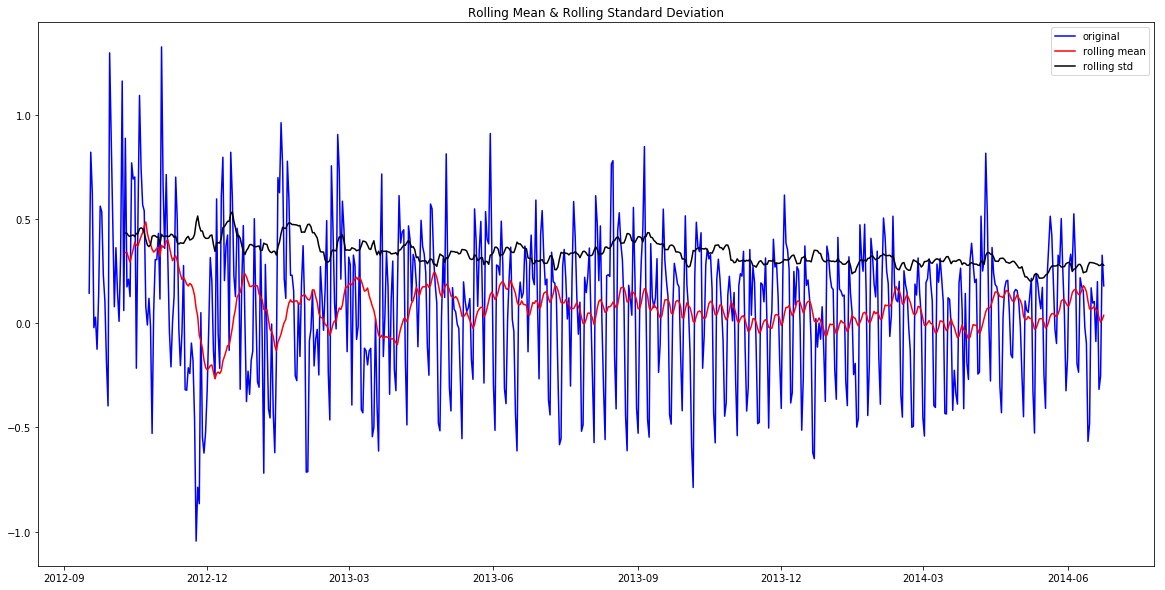

Results of Dickey Fuller test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags used                     2.000000e+01
Number of observations Used    6.250000e+02
Critical Value (10%)          -2.569239e+00
Critical Value (5%)           -2.866175e+00
Critical Value (1%)           -3.440856e+00
dtype: float64


In [67]:
#Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True)

test_stationarity(train_log_moving_avg_diff)

In [68]:
#test statistic is even smaller than critical value than before == > trend is being removed

#now stabilize the mean of the time series which is also a requirement for a stationary time series

train_log_diff = Train_log - Train_log.shift(1)

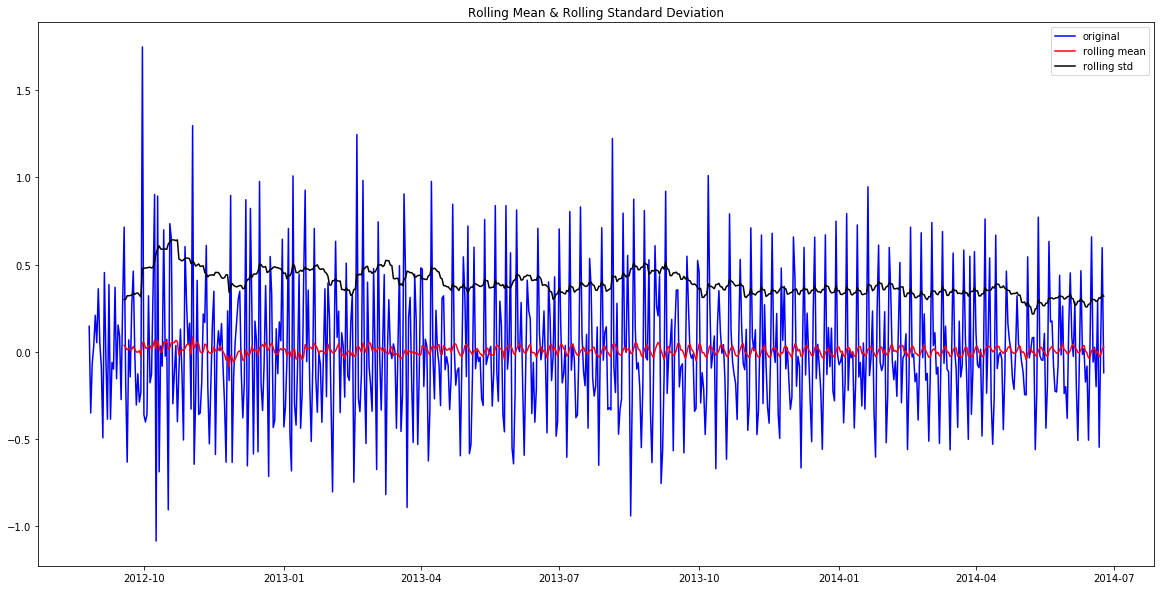

Results of Dickey Fuller test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags used                     1.900000e+01
Number of observations Used    6.480000e+02
Critical Value (10%)          -2.569151e+00
Critical Value (5%)           -2.866011e+00
Critical Value (1%)           -3.440482e+00
dtype: float64


In [69]:
train_log_diff.dropna(inplace=True)
test_stationarity(train_log_diff)

In [70]:
#Removing Seasonality by using the seasonal decomposition to decompose the time series into trend, seasonality, and residuals

from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

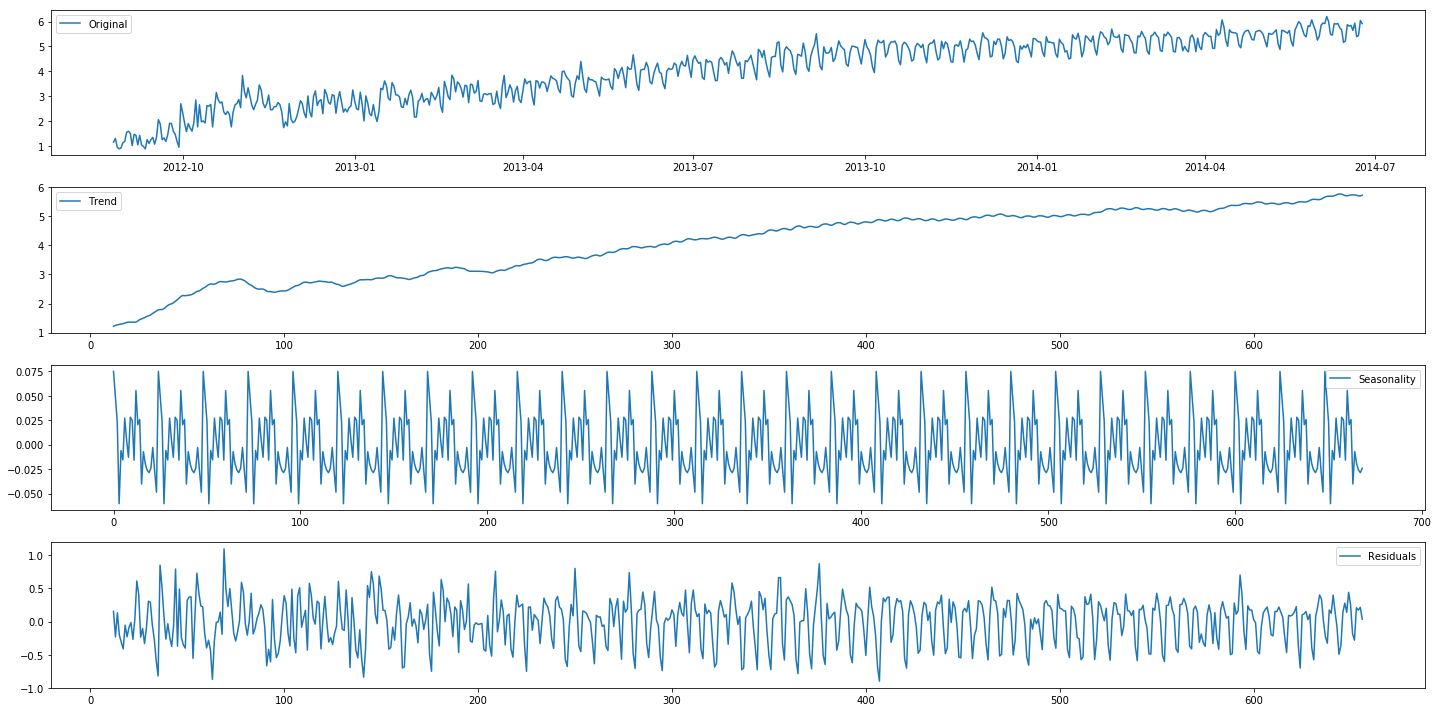

In [72]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

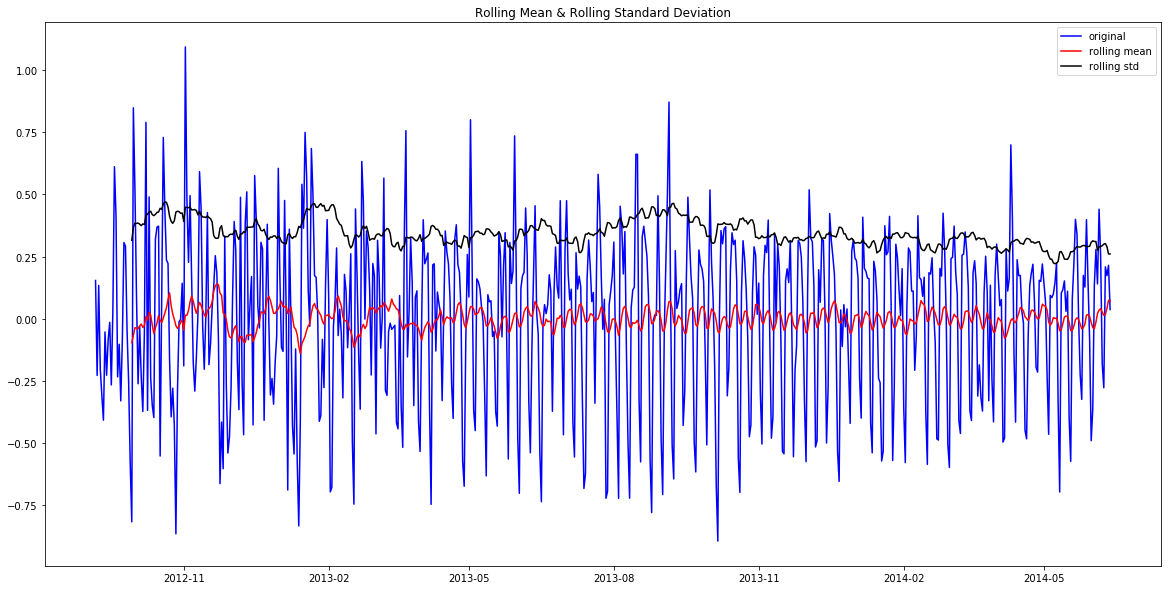

Results of Dickey Fuller test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags used                     2.000000e+01
Number of observations Used    6.240000e+02
Critical Value (10%)          -2.569243e+00
Critical Value (5%)           -2.866183e+00
Critical Value (1%)           -3.440873e+00
dtype: float64


In [73]:
#seasonality shows a constant trend

train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

In [74]:
#residuals are stationary

#now we will forecast the time series using different models

In [75]:
#first need to fit the ARIMA model on our time series, for that we need to have the optimized p,d,q parameters
#use ACF(autocorrelation function) and PACF(partial autocorrelation function)
#ACF is a measure of the correlation between the TimeSeries with a lagged version of itself
#PACF measures the correlation between the TimeSeries with a lagged version of itself

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method = 'ols')

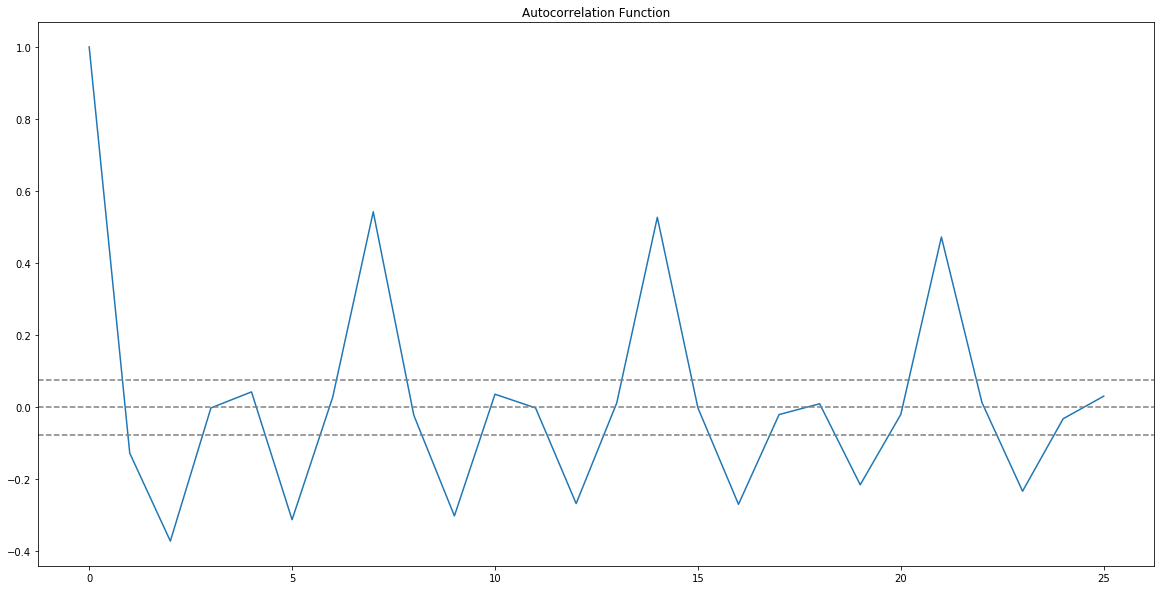

In [76]:
#acf and pacf plot

plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

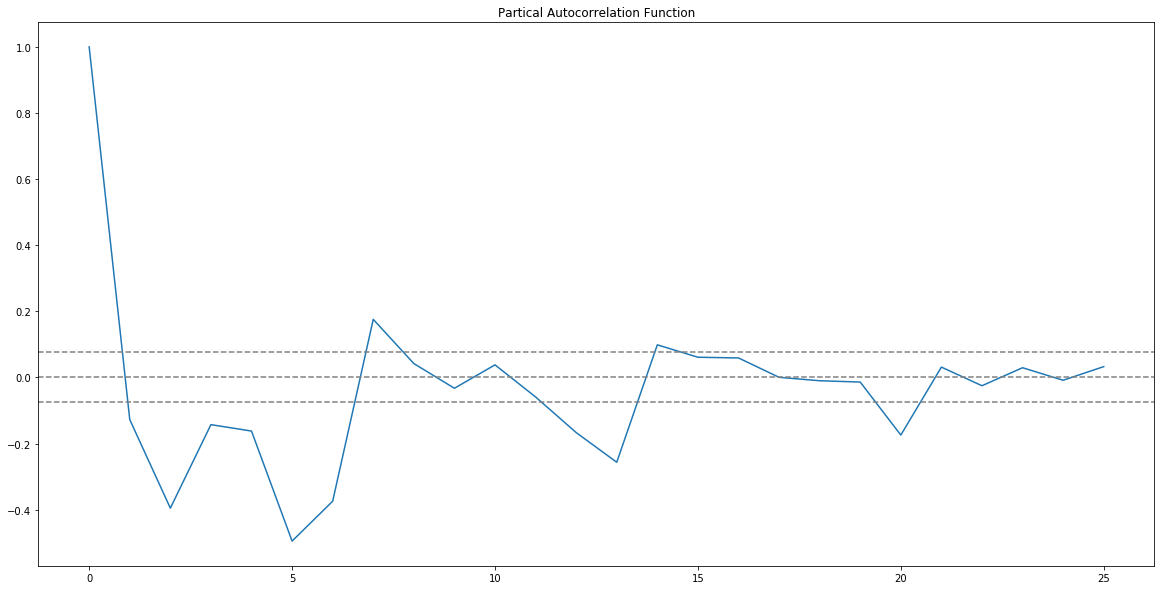

In [77]:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partical Autocorrelation Function')
plt.show()

In [78]:
#p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. in this case p = 1.

#q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. in this case q = 1.

#now we can make the ARIMA model

In [79]:
from statsmodels.tsa.arima_model import ARIMA

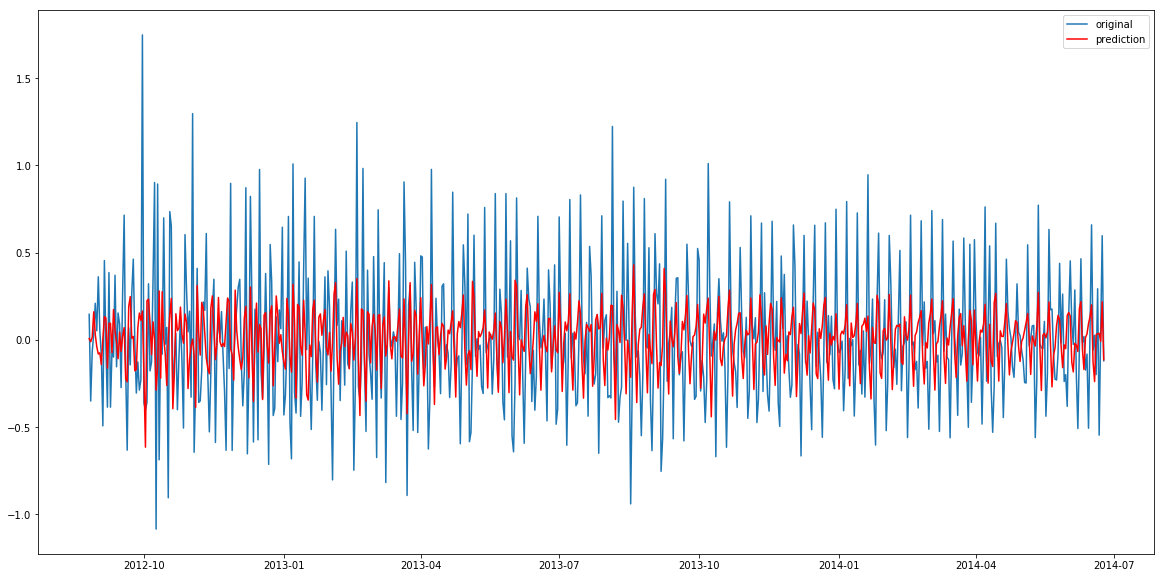

In [80]:
model = ARIMA(Train_log, order = (2,1,0)) #here the q value is 0 since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_AR.fittedvalues, color = 'red', label = 'prediction')
plt.legend(loc = 'best')
plt.show()

In [81]:
#plot validation curve for AR model
#change the scale of the model to the original scale

#First step is to store the predicted results as a separate series and observe it

AR_predict = results_AR.predict(start='2014-06-25', end = '2014-09-25')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = np.exp(AR_predict1)

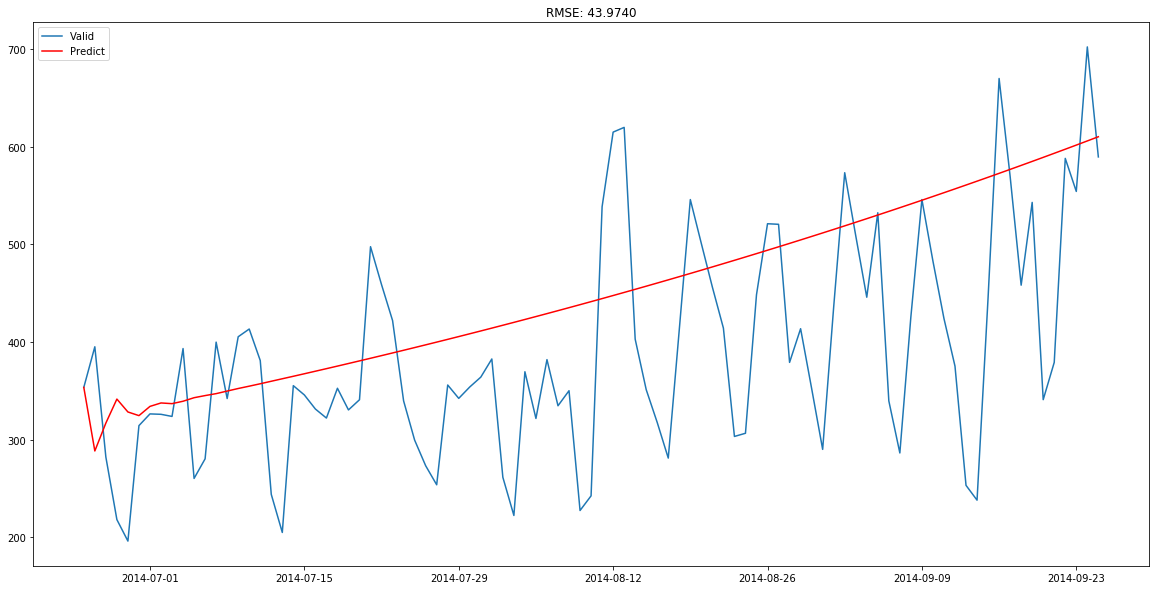

In [82]:
plt.plot(valid['Count'], label = 'Valid')
plt.plot(AR_predict, color = 'red', label = 'Predict')
plt.legend(loc = 'best')
plt.title('RMSE: %.4f' %(np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

In [83]:
#build the moving average, MA, model

#MA model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

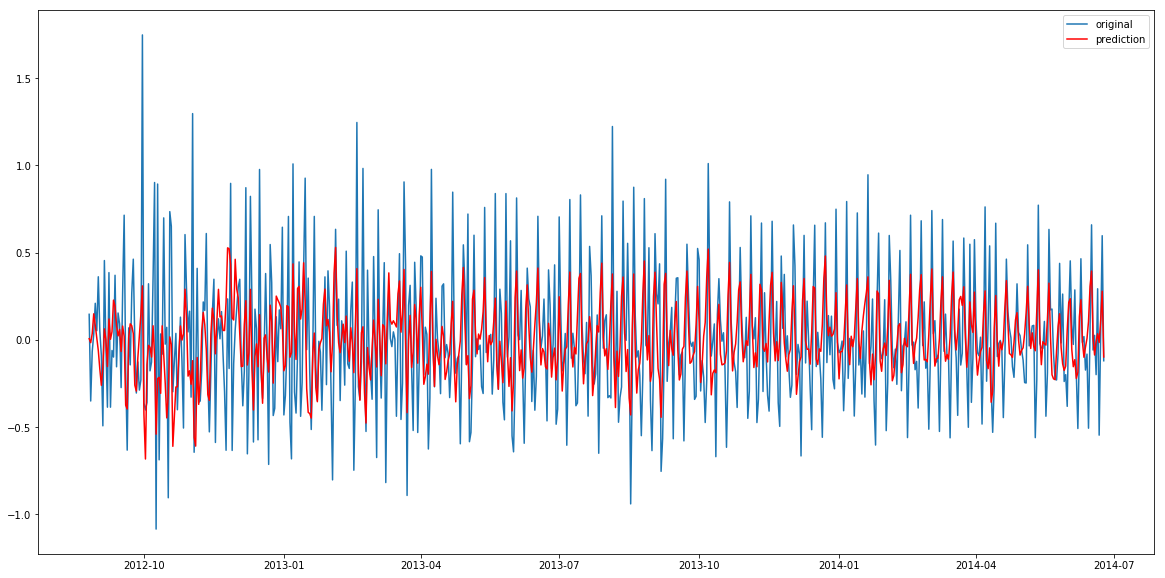

In [84]:
model = ARIMA(Train_log, order=(0,1,2)) #here the p value is 0 since it is just the MA model
results_MA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_MA.fittedvalues, color = 'red', label = 'prediction')
plt.legend(loc = 'best')
plt.show()

In [86]:
MA_predict = results_MA.predict(start = '2014-06-25', end = '2014-09-25')
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['Count'])[0], index = valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)
MA_predict = np.exp(MA_predict1)

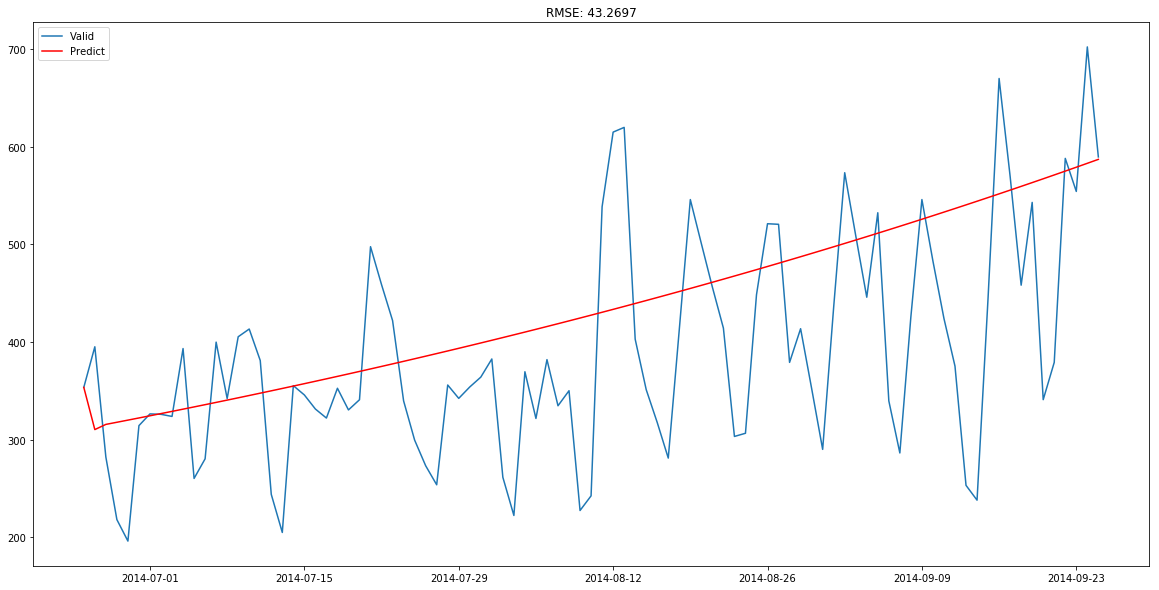

In [88]:
plt.plot(valid['Count'], label = 'Valid')
plt.plot(MA_predict, color = 'red', label = 'Predict')
plt.legend(loc = 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

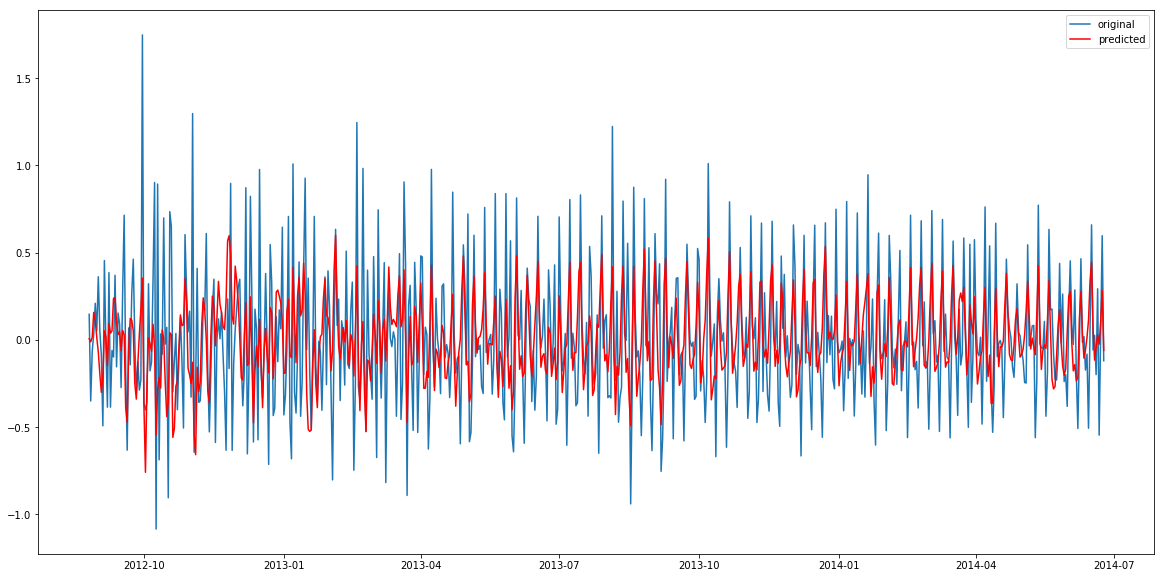

In [89]:
#now let's combine ARIMA and MA

model = ARIMA(Train_log, order = (2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = 'original')
plt.plot(results_ARIMA.fittedvalues, color = 'red', label = 'predicted')
plt.legend(loc = 'best')
plt.show()

In [94]:
#Define a function which can be used to change the scale of the model to the original scale

def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    
    predict_log = predict_base.add(predict_diff, fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = 'Given set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.legend(loc = 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [95]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = 'Given set')
    plt.plot(predict, color = 'red', label = 'Predict')
    plt.legend(loc = 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [96]:
ARIMA_predict_diff = results_ARIMA.predict(start='2014-06-25', end = '2014-09-25')

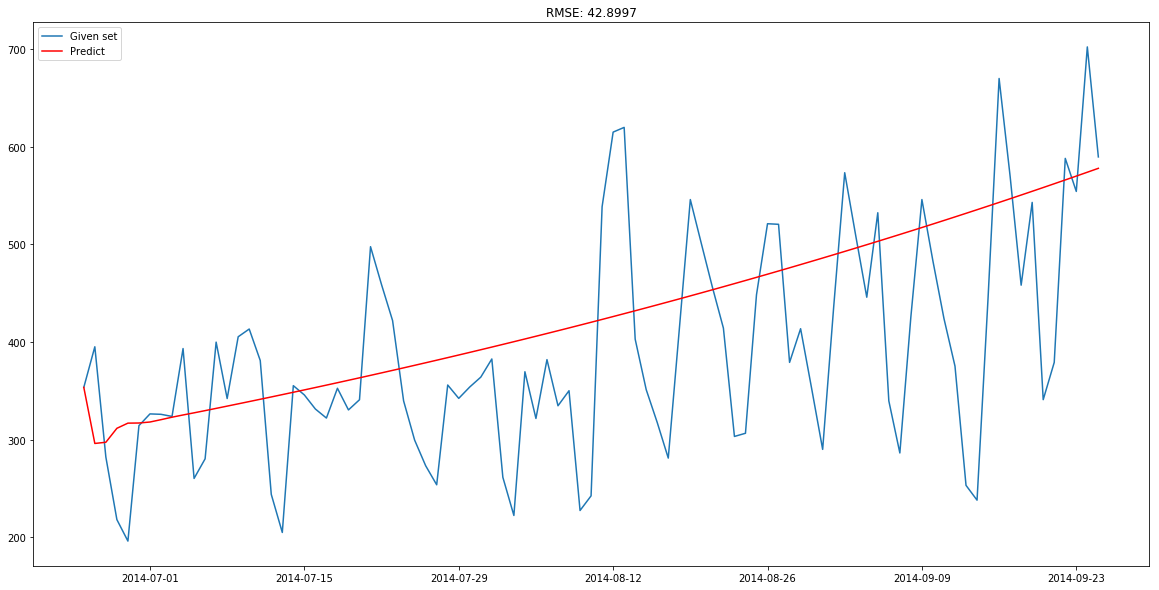

In [97]:
check_prediction_diff(ARIMA_predict_diff, valid)

In [98]:
#SARIMAX

In [99]:
import statsmodels.api as sm

/home/asun/.local/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


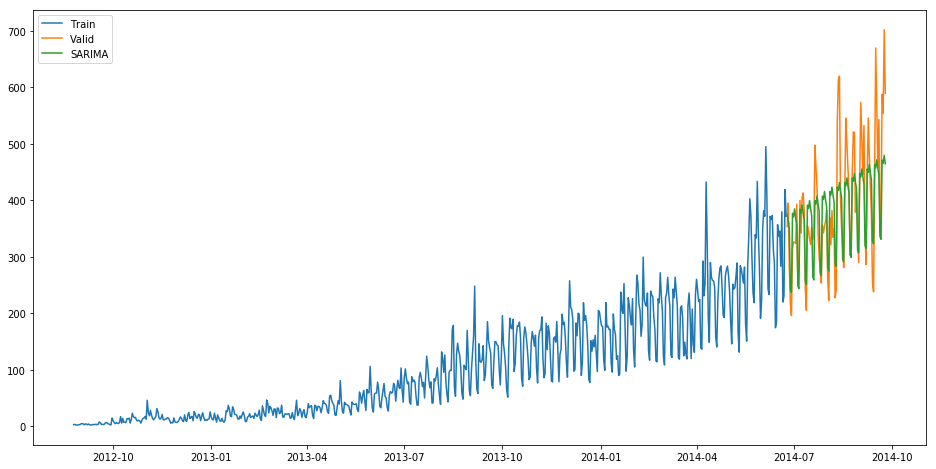

In [100]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order = (2,1,4), seasonal_order = (0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start = '2014-06-25', end = '2014-09-25', dynamic = True)
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['SARIMA'], label = 'SARIMA')
plt.legend(loc = 'best')
plt.show()

In [101]:
#the periodicity is 7 since it is a daily time series and will repeat after 7 days

In [102]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

70.0415647788763


In [103]:
#now forecast the time series for Test data

predict = fit1.predict(start = '2014-9-26', end = '2015-4-26', dynamic = True)

#these are daily but we need hourly
#so we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio

/home/asun/.local/lib/python3.5/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [104]:
test['prediction'] = predict

In [105]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [106]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')